In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [62]:
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
print(len(train_data))
print(len(test_data))
# train_data['job'].value_counts()
# job_counts = train_data['job'].value_counts()
# train_data = train_data[train_data['job'].isin(job_counts[job_counts>5000].index)]

1296675
555719


In [63]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [64]:
(train_data['job'].value_counts()).index

Index(['Film/video editor', 'Exhibition designer', 'Naval architect',
       'Surveyor, land/geomatics', 'Materials engineer',
       'Designer, ceramics/pottery', 'Systems developer', 'IT trainer',
       'Financial adviser', 'Environmental consultant',
       ...
       'Accountant, chartered', 'Industrial buyer', 'Broadcast journalist',
       'Forest/woodland manager', 'Armed forces technical officer',
       'Information officer', 'Veterinary surgeon', 'Ship broker',
       'Contracting civil engineer', 'Warehouse manager'],
      dtype='object', name='job', length=494)

# Feature Engineering
In this section we try to extract usefull information from the dataset such as the age of the transaction issuer and the distance between the issuer and the merchant 

In [65]:
from datetime import date,datetime

def calculate_age(born):
    born =datetime.strptime(born, '%Y-%m-%d').date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


train_data['age']=train_data['dob'].apply(calculate_age)
test_data['age'] = test_data['dob'].apply(calculate_age)


train_data['x'] = (train_data['lat'] - train_data['merch_lat'])**2
train_data['y'] = (train_data['long']-train_data['merch_long'])**2
train_data['distance'] = (train_data['x']+train_data['y'])**0.5
train_data['distance']


test_data['x'] = (test_data['lat'] - test_data['merch_lat'])**2
test_data['y'] = (test_data['long']-test_data['merch_long'])**2
test_data['distance'] = (test_data['x']+test_data['y'])**0.5
test_data['distance']


0         0.266004
1         0.991674
2         0.682970
3         0.250985
4         1.118816
            ...   
555714    0.780782
555715    0.971537
555716    0.935280
555717    0.650323
555718    0.701517
Name: distance, Length: 555719, dtype: float64

In [66]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

label_encoder = LabelEncoder()
min_max_scaler = MinMaxScaler()


train_data['category'] = label_encoder.fit_transform(train_data['category'])
test_data['category'] = label_encoder.transform(test_data['category'])

train_data['gender'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender'] = label_encoder.transform(test_data['gender'])

#Python garbase collector will take care of the unrefrenced columns 
train_data = train_data[['category','amt','gender','city_pop','age','distance','is_fraud']]

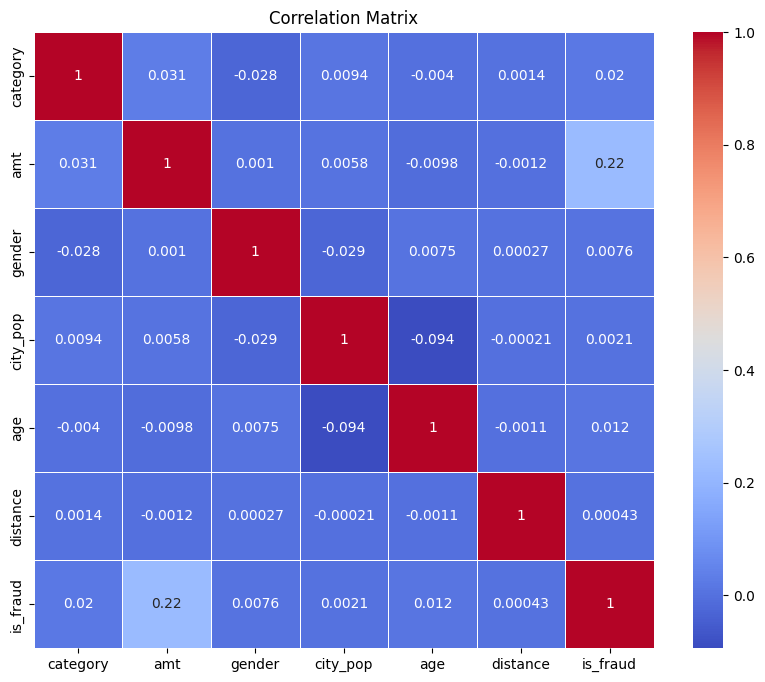

In [67]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

# Plots
Looking into the `amt` distrubition

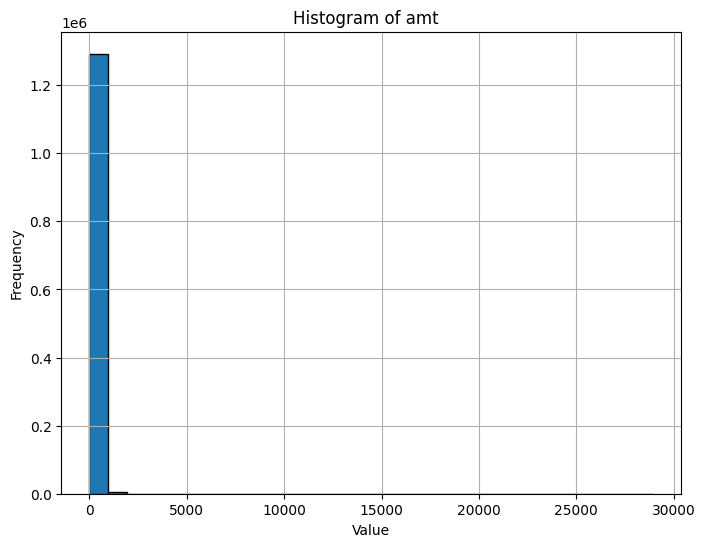

In [68]:

plt.figure(figsize=(8, 6))
train_data['amt'].hist(bins=30, edgecolor='black', range=(train_data['amt'].min(), train_data['amt'].quantile(1)))
plt.title('Histogram of amt  ')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Looking into the `amt` distrubition across various quantiles :O

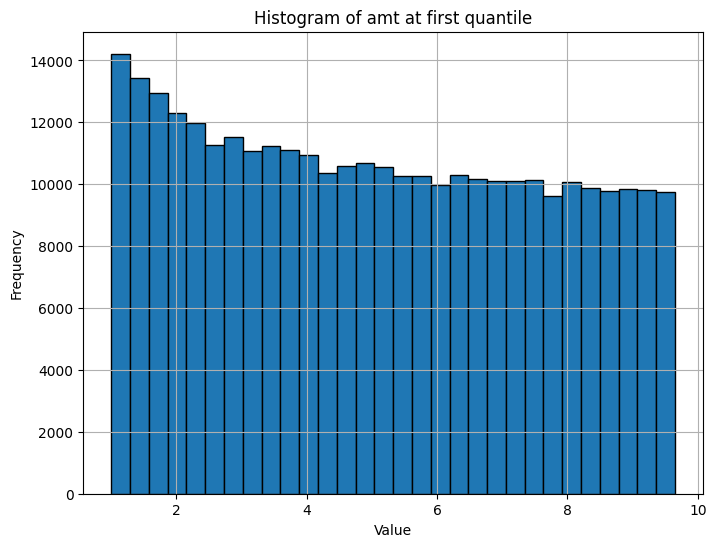

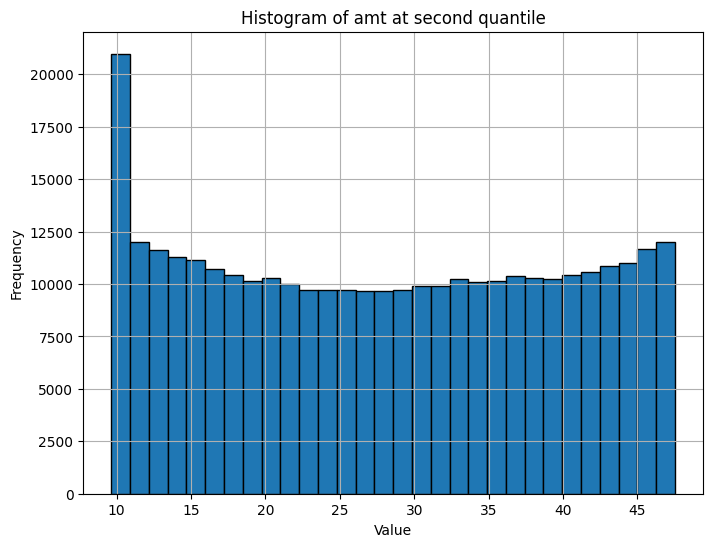

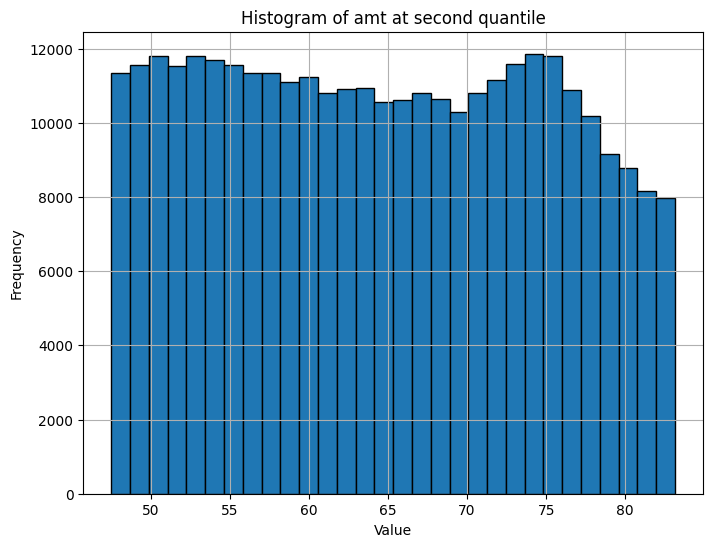

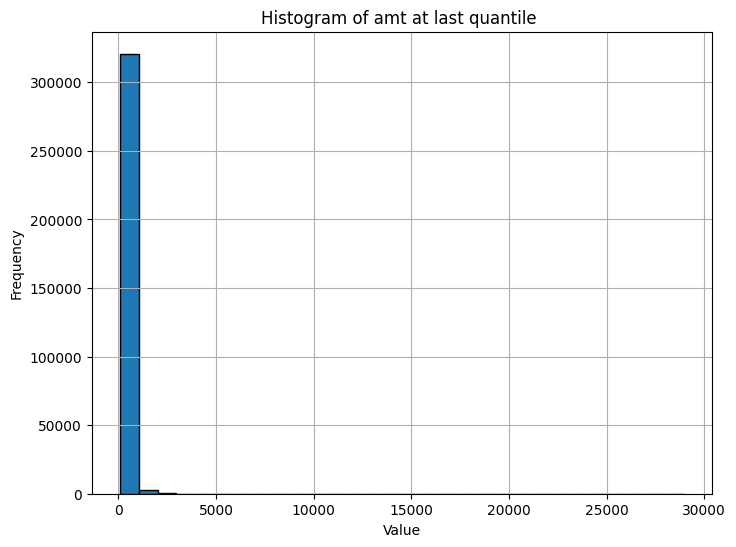

In [69]:
plt.figure(figsize=(8, 6))
train_data['amt'].hist(bins=30, edgecolor='black', range=(train_data['amt'].min(), train_data['amt'].quantile(0.25)))
plt.title('Histogram of amt at first quantile')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
train_data['amt'].hist(bins=30, edgecolor='black', range=(train_data['amt'].quantile(0.25), train_data['amt'].quantile(0.5)))
plt.title('Histogram of amt at second quantile')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
train_data['amt'].hist(bins=30, edgecolor='black', range=(train_data['amt'].quantile(0.5), train_data['amt'].quantile(0.75)))
plt.title('Histogram of amt at second quantile')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
train_data['amt'].hist(bins=30, edgecolor='black', range=(train_data['amt'].quantile(0.75), train_data['amt'].quantile(1)))
plt.title('Histogram of amt at last quantile ')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Box Plot :
Very usefull to detemine how the datapoints are scatterd

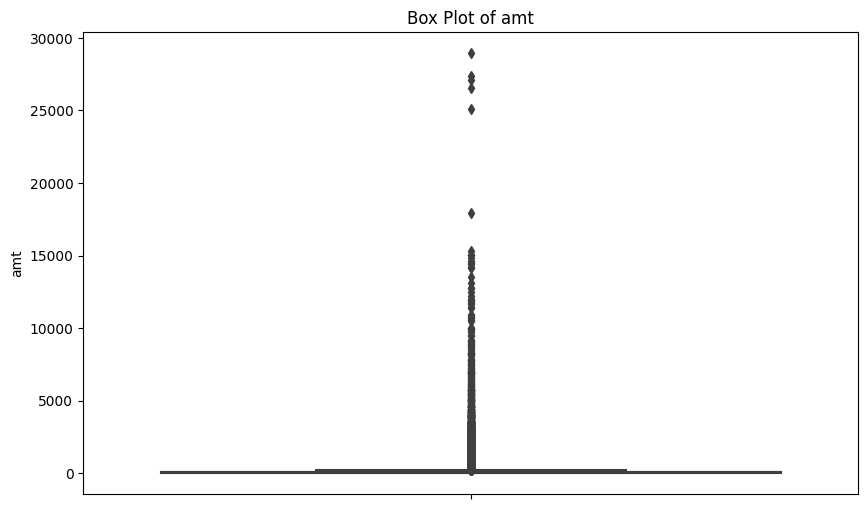

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=train_data['amt'])
plt.title('Box Plot of amt')
plt.show()

# Handling Imbalanced Data : (Downsampling)

In [71]:
train_data_majority = train_data[train_data['is_fraud'] == 0]
train_data_minority = train_data[train_data['is_fraud'] == 1]

sample_size_multiplier = 3

train_data_majority_downsampled = train_data_majority.sample(len(train_data_minority)*sample_size_multiplier)


train_data_downsampled = pd.concat([train_data_majority_downsampled, train_data_minority])


train_data_downsampled = train_data_downsampled.sample(frac=1).reset_index(drop=True)

X_train = train_data_downsampled[['category','amt','gender','city_pop','age','distance']]
y_train = train_data_downsampled[['is_fraud']]

###
test_data = test_data[['category','amt','gender','city_pop','age','distance','is_fraud']]

test_data_downsampled = test_data


test_data_majority = test_data[test_data['is_fraud'] == 0]
test_data_minority = test_data[test_data['is_fraud'] == 1]


test_data_majority_downsampled = test_data_majority.sample(len(test_data_minority)*sample_size_multiplier)


test_data_downsampled = pd.concat([test_data_majority_downsampled, test_data_minority])


test_data_downsampled = test_data_downsampled.sample(frac=1).reset_index(drop=True)



X_test = test_data_downsampled[['category','amt','gender','city_pop','age','distance']]
y_test = test_data_downsampled[['is_fraud']]

# Data Scaling

In [72]:
X_train[['amt','city_pop','age']] = min_max_scaler.fit_transform(X_train[['amt','city_pop','age']])

X_test[['amt','city_pop','age']] = min_max_scaler.transform(X_test[['amt','city_pop','age']])


/tmp/ipykernel_33/1512085786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['amt','city_pop','age']] = min_max_scaler.fit_transform(X_train[['amt','city_pop','age']])
/tmp/ipykernel_33/1512085786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['amt','city_pop','age']] = min_max_scaler.transform(X_test[['amt','city_pop','age']])


In [73]:
len(y_train[y_train['is_fraud']==0])

22518

In [74]:
len(y_train[y_train['is_fraud']==1])

7506

In [75]:
len(y_test[y_test['is_fraud']==0])

6435

In [76]:
len(y_test[y_test['is_fraud']==1])

2145

# Handling Imbalanced Data (Upsampling) :

In [77]:
#Notice that we have imbalanced data ; we can use Upsampling/downsampling to try and solve this issue
from imblearn.over_sampling import SMOTE

smote = SMOTE()


old_X_train , old_y_train = X_train , y_train
X_train, y_train = smote.fit_resample(X_train, y_train)
# X_test , y_test = smote.fit_resample(X_test,y_test)

In [78]:
len(y_train[y_train['is_fraud']==1])

22518

In [79]:
!pip install xgboost

# Models Training and Metrics :

Accuracy : 0.96
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      6435
           1       0.92      0.94      0.93      2145

    accuracy                           0.96      8580
   macro avg       0.95      0.96      0.95      8580
weighted avg       0.97      0.96      0.96      8580



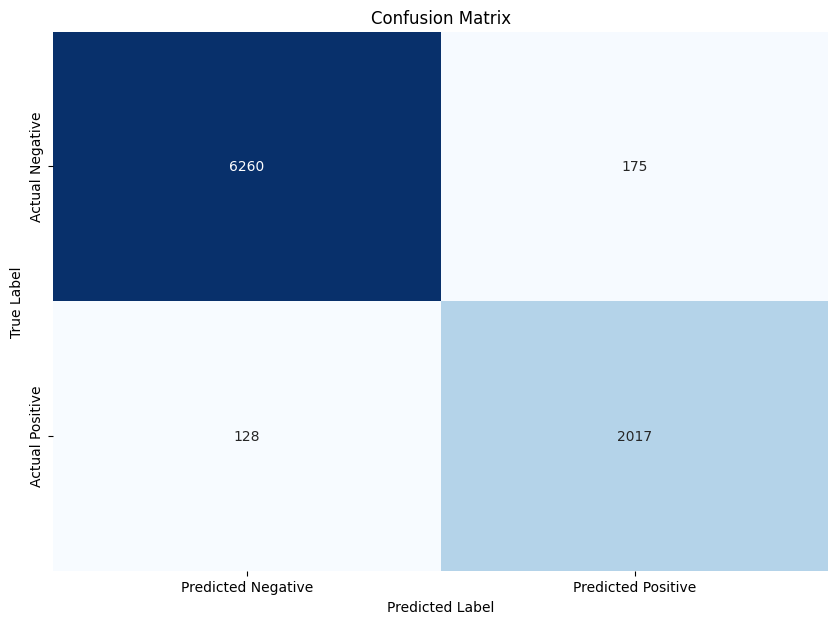

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cs_report = classification_report(y_test,y_pred)
print(f"Accuracy : {accuracy:.2f}")
print('Classification Report :\n',cs_report)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()


/tmp/ipykernel_33/2568785946.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Accuracy : 0.97
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6435
           1       0.94      0.93      0.94      2145

    accuracy                           0.97      8580
   macro avg       0.96      0.96      0.96      8580
weighted avg       0.97      0.97      0.97      8580



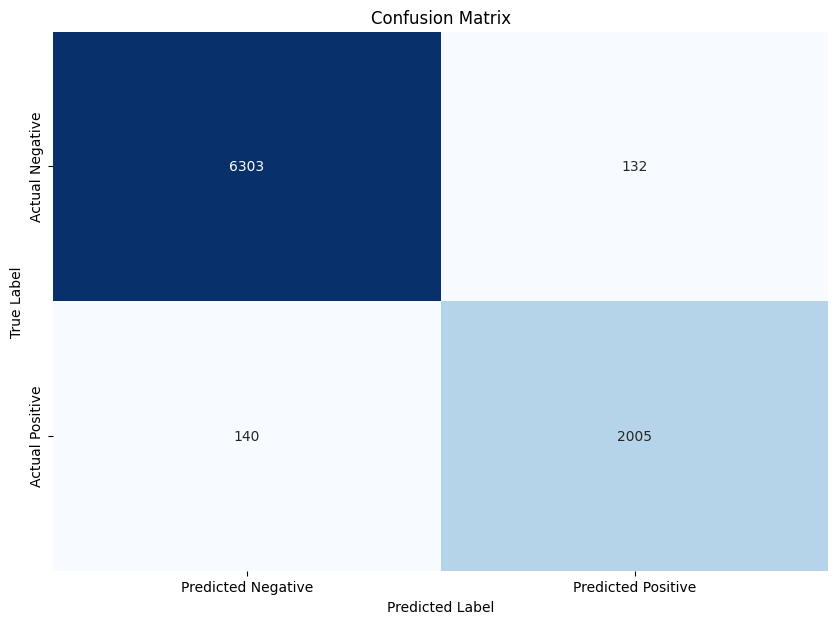

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cs_report = classification_report(y_test,y_pred)

print(f"Accuracy : {accuracy:.2f}")
print('Classification Report :\n',cs_report)


plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.96
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6435
           1       0.90      0.92      0.91      2145

    accuracy                           0.96      8580
   macro avg       0.94      0.95      0.94      8580
weighted avg       0.96      0.96      0.96      8580



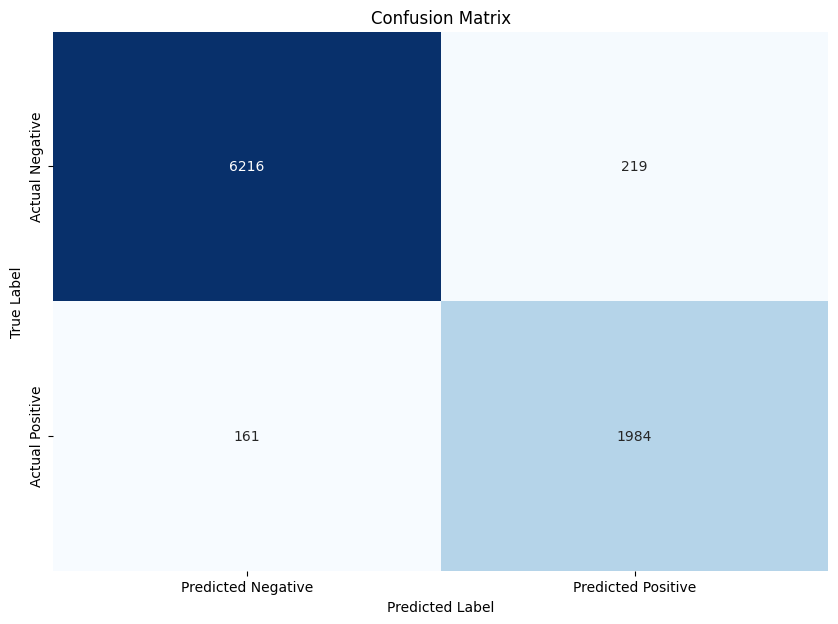

In [82]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
    max_depth=50, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cs_report = classification_report(y_test,y_pred)

print(f"Accuracy : {accuracy:.2f}")
print('Classification Report :\n',cs_report)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.94
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      6435
           1       0.89      0.86      0.87      2145

    accuracy                           0.94      8580
   macro avg       0.92      0.91      0.92      8580
weighted avg       0.94      0.94      0.94      8580



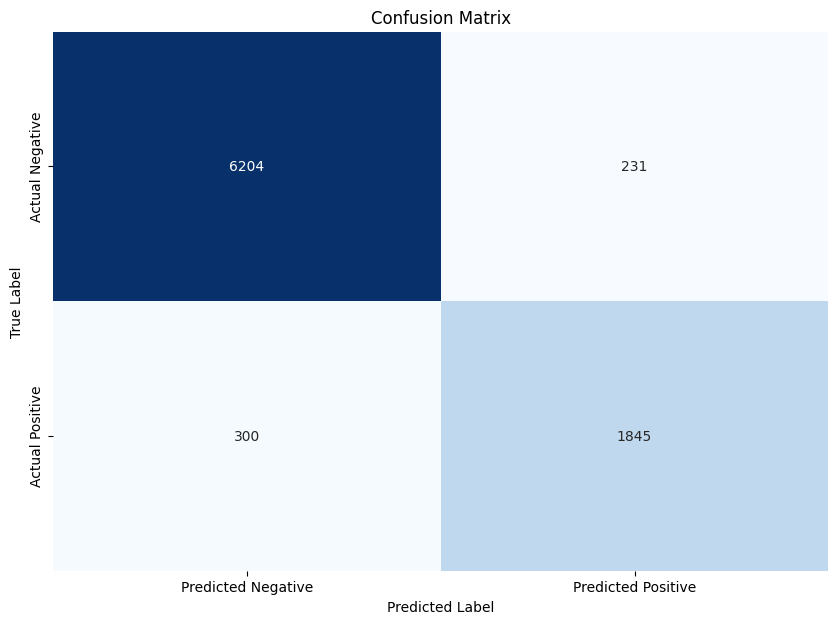

In [83]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=4*1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cs_report = classification_report(y_test,y_pred)

print(f"Accuracy : {accuracy:.2f}")
print('Classification Report :\n',cs_report)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()
